In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
!pip install h5py pyyaml

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [ ]:
data.head(20)

Artist  ...                                             Lyrics
0   12 stones  ...  It starts with pain, followed by hate\nFueled ...
1   12 stones  ...  Freedom!\nAlone again again alone\nPatiently w...
2   12 stones  ...  Biting the hand that feeds you, lying to the v...
3   12 stones  ...  You say you know just who I am\nBut you can't ...
4   12 stones  ...  My heart is beating faster can't control these...
5   12 stones  ...  You say you know just who I am\nBut you can't ...
6   12 stones  ...  Looking for light in the darkness\nIs somethin...
7   12 stones  ...  Mother mother can you hear me,I keep trying\nJ...
8   12 stones  ...  It was you,\nThat showed me who I am,\nAnd tau...
9   12 stones  ...  \nI hear the words you say to me\nI see the wa...
10  12 stones  ...  It's a long way back to reality, she puts anot...
11  12 stones  ...  I'm not okay but patiently I wait\nI sit here ...
12  12 stones  ...  Offer my hand you spit in my face\nBlinded by ...
13  12 stones  ...  Lately I've been wandering\nOff the narrow pat...
14  12 stones  ...  I came home early to see you,\nCouldn't wait t...
15  12 stones  ...  Something\nKeeps on pulling me down\nAnd i fee...
16  12 stones  ...  There's a time in everybody's life\nWhen nothi...
17  12 stones  ...  Time moves slowly while you're gone\nI haven't...
18  12 stones  ...  Say you love and hate me\nAs you desecrate me\...
19  12 stones  ...  Seems so simple, plant the seed\nAnd let it gr...

[20 rows x 5 columns]

In [ ]:
en_data = data[data['Language']=='en']
en_data

Artist  ...                                             Lyrics
0              12 stones  ...  It starts with pain, followed by hate\nFueled ...
1              12 stones  ...  Freedom!\nAlone again again alone\nPatiently w...
2              12 stones  ...  Biting the hand that feeds you, lying to the v...
3              12 stones  ...  You say you know just who I am\nBut you can't ...
4              12 stones  ...  My heart is beating faster can't control these...
...                  ...  ...                                                ...
290178      bobby womack  ...  I'm the best friend he's got I'd give him the ...
290179     bad boys blue  ...  Bad Boys Blue "I Totally Miss You" I did you w...
290180       celine dion  ...  Forgive me for the things That I never said to...
290181          dan bern  ...  The day they found a cure for AIDS The day the...
290182  crawdad republic  ...  Fourth of July has come, it's custom that we g...

[250197 rows x 5 columns]

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|\n@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]') # removing any symbol that is NOT number, letter, space, '#', '+', or '_'.
STOPWORDS = set(stopwords.words('english')) # only dealing with English Lyrics, so set stopwords to 'english'

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub(' ', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with space. 
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    return text

en_data['Lyrics'] = en_data['Lyrics'].apply(clean_text)
en_data['Lyrics'] = en_data['Lyrics'].str.replace('\d+', '') # replacing one or more digits by nothing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
test['Lyrics'] = test['Lyrics'].apply(clean_text)
test['Lyrics'] = test['Lyrics'].str.replace('\d+', '') # replacing one or more digits by nothing

In [ ]:
en_data['length'] = en_data['Lyrics'].str.len()
en_data['Lyrics'].replace('',np.nan,inplace=True)
en_data.dropna(subset=['Lyrics'],inplace=True)
en_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250195 entries, 0 to 290182
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Artist    250195 non-null  object
 1   Song      250194 non-null  object
 2   Genre     250195 non-null  object
 3   Language  250195 non-null  object
 4   Lyrics    250195 non-null  object
 5   length    250195 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 13.4+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [ ]:
en_data.head()

Artist  ... length
0  12 stones  ...    901
1  12 stones  ...    762
2  12 stones  ...    419
3  12 stones  ...    352
4  12 stones  ...    970

[5 rows x 6 columns]

In [ ]:
test.head()

Song  ...  Track_id
0         craftsmanship  ...      8294
1           come-on-out  ...     21621
2                  riot  ...      3301
3  that-s-what-girls-do  ...      2773
4   believe-in-a-dollar  ...     16797

[5 rows x 6 columns]

In [ ]:
lyrics = en_data['Lyrics'].values
genre = en_data['Genre'].values

from sklearn.model_selection import train_test_split

lyrics_train, lyrics_val, genre_train, genre_val = train_test_split(lyrics, genre, test_size=0.2, random_state=100)

In [ ]:
lyrics_test = test['Lyrics'].values
genre_test = test['Genre'].values

y_test = encoder.transform(genre_test)

(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[   0  810]
 [   1  660]
 [   2  495]
 [   3  960]
 [   4  510]
 [   5  660]
 [   6  810]
 [   7 1110]
 [   8  510]
 [   9 1410]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(genre_train)
y_train = encoder.transform(genre_train)
y_val = encoder.transform(genre_val)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[    0  1521]
 [    1  1615]
 [    2  6525]
 [    3  1819]
 [    4  5781]
 [    5 10702]
 [    6 15256]
 [    7 68956]
 [    8  2207]
 [    9 85774]]


In [ ]:
(unique, counts) = np.unique(y_val, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[    0   369]
 [    1   390]
 [    2  1644]
 [    3   419]
 [    4  1459]
 [    5  2612]
 [    6  3877]
 [    7 17341]
 [    8   557]
 [    9 21371]]


In [ ]:
from keras.utils import np_utils

dummy_y_train = np_utils.to_categorical(y_train)
dummy_y_val = np_utils.to_categorical(y_val)

dummy_y_train.shape, dummy_y_val.shape

((200156, 10), (50039, 10))

In [ ]:
dummy_y_test = np_utils.to_categorical(y_test)


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer = Tokenizer(num_words=5000)   # num_words is the size of the vocabulary (top 5000 frequent words in the vocabulary)
tokenizer.fit_on_texts(lyrics_train)    # Updates internal vocabulary based on a list of texts

X_train = tokenizer.texts_to_sequences(lyrics_train)  # Transforms each text in texts to a sequence of integers with its corresponding integer value from the word_index dictionary
X_val = tokenizer.texts_to_sequences(lyrics_val)

# The number of unique words in the whole training text
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index for padding


In [ ]:
X_test = tokenizer.texts_to_sequences(lyrics_test)

In [ ]:
def FindMaxLength(lst):
    maxList = max((x) for x in lst)
    maxLength = max(len(x) for x in lst )
  
    return maxList, maxLength

print(FindMaxLength(X_train))

([4999, 1101, 455, 455, 6, 362, 930, 5, 5, 42, 1604, 516, 8, 46, 7, 12, 42, 1131, 72, 1188, 175, 227, 529, 198, 263, 27, 1130, 2976, 2976, 66, 425, 2562, 2562, 12, 89, 1059, 62, 484, 98, 87, 583, 642, 7, 852, 30, 27, 22, 8, 42, 2312, 10, 295, 474, 294, 278, 5, 19, 211, 1101, 1101, 1101, 1101, 1101, 22, 8, 42, 2312, 10, 295, 474, 294, 278, 5, 19, 211, 2976, 2976, 66, 425, 2562, 2562, 12, 89, 1059, 62, 484, 34], 1473)


In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)

X_train.shape, X_val.shape

((200156, 500), (50039, 500))

In [ ]:
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
X_test.shape

(7935, 500)

### Using CNN as an alternative to LSTM (batch size: 128)

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D

embedding_dim = 50
vocab_size = 5000
num_filters = 128
kernel_size = 3


model01 = Sequential()
model01.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=maxlen))          # input_length is the length of the sequence
model01.add(Conv1D(num_filters,               # add a Convolution1D, which will learn filters
                 kernel_size,       # convolutional windows length, which mean will operate over 3 words every time
                 padding='valid',
                 activation='relu',
                 strides=1))
model01.add(GlobalMaxPooling1D())    # use max pooling to reduce the size of the feature maps
model01.add(Dense(200, activation='relu'))
model01.add(Dropout(0.2))
model01.add(Dense(10, activation='softmax'))
model01.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 50)           250000    
_________________________________________________________________
conv1d (Conv1D)              (None, 498, 128)          19328     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               25800     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 297,138
Trainable params: 297,138
Non-trainable params: 0
__________________________________________________

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

hist01 = model01.fit(X_train, dummy_y_train,
          batch_size=128,
          epochs=5,
          validation_data=(X_val, dummy_y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/5
1564/1564 [==============================] - 100s 44ms/step - loss: 1.3493 - accuracy: 0.5296 - val_loss: 1.1250 - val_accuracy: 0.6101
Epoch 2/5
1564/1564 [==============================] - 68s 44ms/step - loss: 1.0696 - accuracy: 0.6396 - val_loss: 1.0863 - val_accuracy: 0.6344
Epoch 3/5
1564/1564 [==============================] - 68s 43ms/step - loss: 0.9777 - accuracy: 0.6763 - val_loss: 1.0782 - val_accuracy: 0.6392
Epoch 4/5
1564/1564 [==============================] - 68s 43ms/step - loss: 0.8859 - accuracy: 0.7119 - val_loss: 1.0910 - val_accuracy: 0.6416
Epoch 5/5
1564/1564 [==============================] - 68s 43ms/step - loss: 0.7985 - accuracy: 0.7418 - val_loss: 1.1182 - val_accuracy: 0.6406


Save the model

In [ ]:
# Save the entire model to a HDF5 file
model01.save('CNN_model_epoch5.h5')

Recreate the model from the file


In [ ]:
# Recreate the exact same model, including weights anf optimizer.
saved_CNN_e5 = keras.models.load_model('CNN_model_epoch5.h5')
saved_CNN_e5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 50)           250000    
_________________________________________________________________
conv1d (Conv1D)              (None, 498, 128)          19328     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               25800     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 297,138
Trainable params: 297,138
Non-trainable params: 0
__________________________________________________

check its accuracy

In [ ]:
loss, accuracy = saved_CNN_e5.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Testing Accuracy:  0.2887


Check the prediction results in validation dataset

In [ ]:
prediction = model01.predict(X_val)

labels = ['Country', 'Electric', 'Folk', 'Hip-hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'R&B', 'Rock']
print(prediction)
pred_str = []
for i in range(50039):
  pred_str.append(labels[np.argmax(prediction[i])])
print(pred_str)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[2.08511745e-04 3.09709087e-03 1.92551210e-03 ... 1.83192343e-01
  7.33025430e-04 7.81361580e-01]
 [1.19928783e-03 2.72303838e-02 8.63356423e-03 ... 4.64157701e-01
  5.98430727e-03 3.52328241e-01]
 [2.50478112e-03 9.89237451e-04 1.59570426e-02 ... 5.77845015e-02
  4.46536782e-04 8.91028106e-01]
 ...
 [1.60933385e-04 1.13012185e-02 6.13235286e-04 ... 9.33679938e-01
  1.48617374e-02 1.97877362e-02]
 [4.04723175e-02 1.01823360e-02 2.07469329e-01 ... 1.37480587e-01
  6.72242790e-03 4.72600937e-01]
 [1.82211861e-05 1.35030402e-02 1.63635833e-03 ... 7.19951391e-02
  9.93350404e-04 5.41933738e-02]]
['Rock', 'Pop', 'Rock', 'Pop', 'Pop', 'Rock', 'Pop', 'Pop', 'Rock', 'Rock', 'Jazz', 'Rock', 'Pop', 'Pop', 'Rock', 'Metal', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Pop', 'Pop', 'Pop', 'Rock', 'Rock', 'Rock', 'Jazz', 'Pop', 'Metal', 'Rock', 'Rock', 'Pop', 'Rock', 'Pop', 'Pop', 'Rock', 'Metal', 'Pop', 'Rock', 'Rock', 'Pop', 'Metal', 'Pop', 'Metal', 'Jazz', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Pop'

In [ ]:
(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['Folk' '247']
 ['Hip-hop' '16']
 ['Indie' '22']
 ['Jazz' '2364']
 ['Metal' '3376']
 ['Pop' '18478']
 ['Rock' '25536']]


Visualise the training process

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Training Accuracy: 0.7879
Testing Accuracy:  0.6406


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd166dcee10>,
       dtype=object))

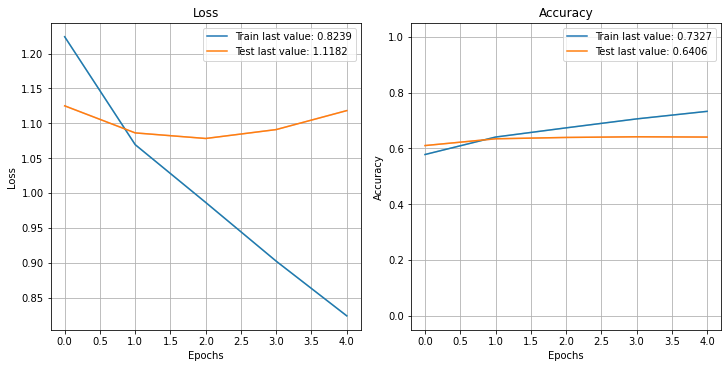

In [ ]:
!pip install plot_keras_history
from plot_keras_history import plot_history

loss, accuracy = model01.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model01.evaluate(X_val, dummy_y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist01)

Check the prediction results in testing dataset

In [ ]:
prediction = model01.predict(X_test)

labels = ['Country', 'Electric', 'Folk', 'Hip-hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'R&B', 'Rock']
print(prediction)
pred_str = []
for i in range(7935):
  pred_str.append(labels[np.argmax(prediction[i])])
print(pred_str)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[4.8421440e-03 9.2789521e-03 3.5968963e-02 ... 4.2011863e-01
  8.5639646e-03 4.1222832e-01]
 [1.6817733e-03 1.5894931e-02 1.0774327e-02 ... 3.1510732e-01
  6.0557444e-03 5.3003526e-01]
 [6.9850998e-06 1.0481815e-02 1.4330855e-03 ... 5.3088043e-02
  2.0561360e-04 1.1522677e-01]
 ...
 [6.8728441e-06 4.7276616e-03 1.5755001e-04 ... 7.9906839e-01
  2.1924195e-03 1.2356564e-03]
 [8.5699735e-03 5.8458047e-04 5.4257784e-02 ... 3.6502626e-02
  3.6637872e-04 8.8342679e-01]
 [1.0961809e-02 1.7067214e-02 3.8500730e-02 ... 1.5033947e-01
  5.2323849e-03 6.4148456e-01]]
['Pop', 'Rock', 'Metal', 'Pop', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock', 'Jazz', 'Metal', 'Rock', 'Pop', 'Rock', 'Metal', 'Jazz', 'Pop', 'Pop', 'Rock', 'Pop', 'Pop', 'Pop', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Pop', 'Pop', 'Metal', 'Pop', 'Rock', 'Pop', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Metal', 'Rock', 'Pop', 'Pop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', '

In [ ]:
(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['Folk' '86']
 ['Hip-hop' '6']
 ['Indie' '3']
 ['Jazz' '314']
 ['Metal' '775']
 ['Pop' '2886']
 ['Rock' '3865']]


# Only 4 epochs

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D

embedding_dim = 50
vocab_size = 5000
num_filters = 128
kernel_size = 3


model001 = Sequential()
model001.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=maxlen))          # input_length is the length of the sequence
model001.add(Conv1D(num_filters,               # add a Convolution1D, which will learn filters
                 kernel_size,       # convolutional windows length, which mean will operate over 3 words every time
                 padding='valid',
                 activation='relu',
                 strides=1))
model001.add(GlobalMaxPooling1D())    # use max pooling to reduce the size of the feature maps
model001.add(Dense(200, activation='relu'))
model001.add(Dropout(0.2))
model001.add(Dense(10, activation='softmax'))
model001.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model001.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 50)           250000    
_________________________________________________________________
conv1d (Conv1D)              (None, 498, 128)          19328     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               25800     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 297,138
Trainable params: 297,138
Non-trainable params: 0
__________________________________________________

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

hist001 = model001.fit(X_train, dummy_y_train,
          batch_size=128,
          epochs=4,
          validation_data=(X_val, dummy_y_val))

Epoch 1/4
   3/1564 [..............................] - ETA: 1:03 - loss: 2.2758 - accuracy: 0.1328

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


1564/1564 [==============================] - 69s 44ms/step - loss: 1.3456 - accuracy: 0.5327 - val_loss: 1.1172 - val_accuracy: 0.6217
Epoch 2/4
1564/1564 [==============================] - 69s 44ms/step - loss: 1.0687 - accuracy: 0.6436 - val_loss: 1.0888 - val_accuracy: 0.6353
Epoch 3/4
1564/1564 [==============================] - 69s 44ms/step - loss: 0.9767 - accuracy: 0.6788 - val_loss: 1.0737 - val_accuracy: 0.6437
Epoch 4/4
1564/1564 [==============================] - 69s 44ms/step - loss: 0.8856 - accuracy: 0.7125 - val_loss: 1.0879 - val_accuracy: 0.6451


Save the model

In [ ]:
# Save the entire model to a HDF5 file
model001.save('CNN_model_epoch4.h5')

Recreate the model from the file


In [ ]:
# Recreate the exact same model, including weights anf optimizer.
saved_CNN = keras.models.load_model('CNN_model_epoch4.h5')
saved_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 50)           250000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 498, 128)          19328     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               25800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 297,138
Trainable params: 297,138
Non-trainable params: 0
________________________________________________

check its accuracy

In [ ]:
loss, accuracy = saved_CNN.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Testing Accuracy:  0.2930


Check the prediction results in validation dataset

In [ ]:
prediction = model001.predict(X_val)

labels = ['Country', 'Electric', 'Folk', 'Hip-hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'R&B', 'Rock']
print(prediction)
pred_str = []
for i in range(50039):
  pred_str.append(labels[np.argmax(prediction[i])])
print(pred_str)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[8.19781853e-04 8.72414839e-03 5.64530678e-03 ... 1.20877944e-01
  1.80457544e-03 5.46531439e-01]
 [1.03022729e-03 1.07319597e-02 1.03715882e-02 ... 2.47006550e-01
  2.06388719e-03 5.39020181e-01]
 [2.46720295e-02 2.51044496e-03 9.19424891e-02 ... 9.60990936e-02
  4.17385437e-03 7.20396578e-01]
 ...
 [6.22012740e-05 3.31561430e-03 2.70903169e-04 ... 9.64359343e-01
  1.00865001e-02 4.98553878e-03]
 [1.55211696e-02 3.05080926e-03 1.50959611e-01 ... 2.21383974e-01
  5.20055043e-03 5.13287961e-01]
 [1.46645456e-04 5.04876813e-03 5.29918587e-03 ... 3.26996893e-02
  1.04294426e-03 6.58177584e-02]]
['Rock', 'Rock', 'Rock', 'Pop', 'Pop', 'Rock', 'Pop', 'Pop', 'Rock', 'Rock', 'Jazz', 'Jazz', 'Pop', 'Pop', 'Rock', 'Metal', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Pop', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Jazz', 'Pop', 'Metal', 'Pop', 'Rock', 'Rock', 'Rock', 'Pop', 'Pop', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Pop', 'Metal', 'Pop', 'Metal', 'Jazz', 'Rock', 'Jazz', 'Rock', 'Rock', 'Rock', 'Po

In [ ]:
(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['Folk' '223']
 ['Hip-hop' '27']
 ['Indie' '18']
 ['Jazz' '2582']
 ['Metal' '3772']
 ['Pop' '17349']
 ['Rock' '26068']]


Visualise the training process

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.29-cp37-none-any.whl size=8614 sha256=500cf8240ac6d905194a62f6fcc775de955c191d07cfa35091ce62f4974abd37
  Stored in directory: /root/.cache/pip/wheels/8b/cb/fb/cbeba24d72e736b8987b7d0dc37afc0e76f3c16e544ceff727
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.26-cp37-none-any.whl size=7610 sha256=4c0e94a3c0d7d6c6befb48567fd3348e209d6eed8345d8c4a5391a3efc631fdc
  Stored in directory: /root/.cache/pip/wheels/2a/62/31/d348320becc60729f508a2c5aad445b94d7543c5cb577cfb9d
  Created wheel for compress-json: filename=compress_json-1.0.4-cp37-none-any.whl size=4586 sha256=589be0061d2143d6e60ad789ee379b0432db368d9b5b4189faa831830b1ef6ce
  Stored in directory: /root/.cache/pip/wheels/83/ec/21/51460dd508e4a152c0643946c21fae84eb3391171164d35745
Successfully built plot-keras-history sanitize-ml-labels compress-json


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Training Accuracy: 0.7632
Testing Accuracy:  0.6451


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd181793f50>,
       dtype=object))

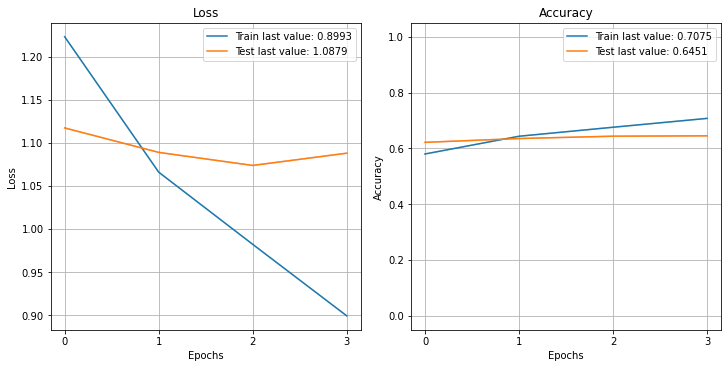

In [ ]:
!pip install plot_keras_history
from plot_keras_history import plot_history

loss, accuracy = model001.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model001.evaluate(X_val, dummy_y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist001)

### Using CNN as an alternative to LSTM (batch size: 64)


In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D

embedding_dim = 50
vocab_size = 5000
num_filters = 128
kernel_size = 3


model02 = Sequential()
model02.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=maxlen))          # input_length is the length of the sequence
model02.add(Conv1D(num_filters,               # add a Convolution1D, which will learn filters
                 kernel_size,       # convolutional windows length, which mean will operate over 3 words every time
                 padding='valid',
                 activation='relu',
                 strides=1))
model02.add(GlobalMaxPooling1D())    # use max pooling to reduce the size of the feature maps
model02.add(Dense(200, activation='relu'))
model02.add(Dropout(0.2))
model02.add(Dense(10, activation='softmax'))
model02.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model02.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 50)           250000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 498, 128)          19328     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               25800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2010      
Total params: 297,138
Trainable params: 297,138
Non-trainable params: 0
________________________________________________

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

hist02 = model02.fit(X_train, dummy_y_train,
          batch_size=64,
          epochs=5,
          validation_data=(X_val, dummy_y_val))

Epoch 1/5
   1/3128 [..............................] - ETA: 5:43 - loss: 2.2953 - accuracy: 0.3125

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


3128/3128 [==============================] - 105s 34ms/step - loss: 1.3027 - accuracy: 0.5467 - val_loss: 1.1148 - val_accuracy: 0.6219
Epoch 2/5
3128/3128 [==============================] - 105s 33ms/step - loss: 1.0584 - accuracy: 0.6444 - val_loss: 1.0835 - val_accuracy: 0.6345
Epoch 3/5
3128/3128 [==============================] - 104s 33ms/step - loss: 0.9673 - accuracy: 0.6776 - val_loss: 1.0792 - val_accuracy: 0.6407
Epoch 4/5
3128/3128 [==============================] - 106s 34ms/step - loss: 0.8756 - accuracy: 0.7136 - val_loss: 1.1015 - val_accuracy: 0.6430
Epoch 5/5
3128/3128 [==============================] - 106s 34ms/step - loss: 0.7929 - accuracy: 0.7395 - val_loss: 1.1257 - val_accuracy: 0.6451


Save the model

In [ ]:
# Save the entire model to a HDF5 file
model02.save('CNN_model_batch64.h5')

Recreate the model from the file


In [ ]:
# Recreate the exact same model, including weights anf optimizer.
saved_CNN_bat64 = keras.models.load_model('CNN_model_batch64.h5')
saved_CNN_bat64.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 50)           250000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 498, 128)          19328     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               25800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2010      
Total params: 297,138
Trainable params: 297,138
Non-trainable params: 0
________________________________________________

check its accuracy

In [ ]:
loss, accuracy = saved_CNN_bat64.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Testing Accuracy:  0.2912


Check the prediction results in validation dataset

In [ ]:
prediction = model02.predict(X_val)

labels = ['Country', 'Electric', 'Folk', 'Hip-hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'R&B', 'Rock']
print(prediction)
pred_str = []
for i in range(50039):
  pred_str.append(labels[np.argmax(prediction[i])])
print(pred_str)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[1.5802147e-04 7.5260755e-03 9.9423481e-04 ... 1.5805036e-01
  1.8749943e-03 7.8618884e-01]
 [5.9410947e-04 2.4238372e-02 6.4479704e-03 ... 2.3854318e-01
  1.0433661e-02 2.9637665e-01]
 [3.0187890e-03 1.2140448e-03 1.5241757e-02 ... 6.8114765e-02
  1.3547408e-03 8.9604324e-01]
 ...
 [6.0090508e-05 6.6899774e-03 2.9403076e-04 ... 9.1554421e-01
  2.9860064e-02 5.0961790e-03]
 [9.3722297e-03 2.4090933e-03 8.4838413e-02 ... 9.2864044e-02
  2.4715352e-03 7.7556485e-01]
 [5.7397315e-06 2.8003301e-02 2.1031538e-03 ... 1.6307956e-02
  1.3514612e-03 4.0695190e-02]]
['Rock', 'Metal', 'Rock', 'Pop', 'Pop', 'Rock', 'Pop', 'Pop', 'Rock', 'Rock', 'Jazz', 'Jazz', 'Pop', 'Pop', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Pop', 'Pop', 'Pop', 'Rock', 'Rock', 'Rock', 'Jazz', 'Rock', 'Metal', 'Pop', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock', 'Rock', 'Metal', 'Rock', 'Pop', 'Rock', 'Pop', 'Metal', 'Rock', 'Metal', 'Jazz', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock', 'Pop', 'Rock', 'Pop', '

In [ ]:
(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['Folk' '185']
 ['Hip-hop' '66']
 ['Indie' '34']
 ['Jazz' '2125']
 ['Metal' '3489']
 ['Pop' '16181']
 ['Rock' '27959']]


Visualise the training process

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Training Accuracy: 0.7823
Testing Accuracy:  0.6451


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd165c10610>,
       dtype=object))

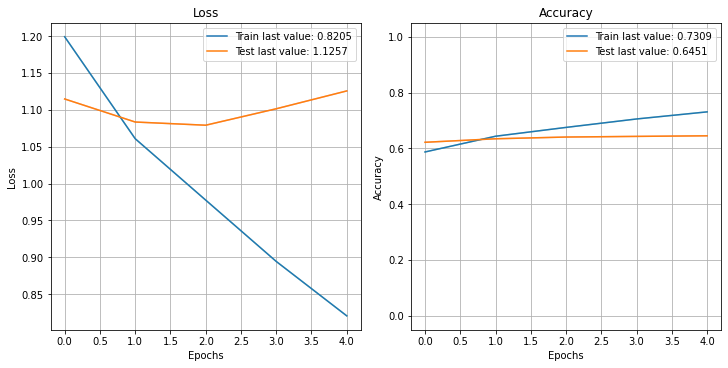

In [ ]:
loss, accuracy = model02.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model02.evaluate(X_val, dummy_y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist02)

### Stop at epoch 3

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D

embedding_dim = 50
vocab_size = 5000
num_filters = 128
kernel_size = 3


model002 = Sequential()
model002.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=maxlen))          # input_length is the length of the sequence
model002.add(Conv1D(num_filters,               # add a Convolution1D, which will learn filters
                 kernel_size,       # convolutional windows length, which mean will operate over 3 words every time
                 padding='valid',
                 activation='relu',
                 strides=1))
model002.add(GlobalMaxPooling1D())    # use max pooling to reduce the size of the feature maps
model002.add(Dense(200, activation='relu'))
model002.add(Dropout(0.2))
model002.add(Dense(10, activation='softmax'))
model002.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model002.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 50)           250000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 498, 128)          19328     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               25800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2010      
Total params: 297,138
Trainable params: 297,138
Non-trainable params: 0
________________________________________________

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

hist002 = model002.fit(X_train, dummy_y_train,
          batch_size=64,
          epochs=3,
          validation_data=(X_val, dummy_y_val))

Epoch 1/3
   3/3128 [..............................] - ETA: 1:35 - loss: 2.3106 - accuracy: 0.0885

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


3128/3128 [==============================] - 104s 33ms/step - loss: 1.3011 - accuracy: 0.5480 - val_loss: 1.1108 - val_accuracy: 0.6199
Epoch 2/3
3128/3128 [==============================] - 104s 33ms/step - loss: 1.0593 - accuracy: 0.6430 - val_loss: 1.0846 - val_accuracy: 0.6315
Epoch 3/3
3128/3128 [==============================] - 105s 33ms/step - loss: 0.9665 - accuracy: 0.6808 - val_loss: 1.0817 - val_accuracy: 0.6400


Save the model

In [ ]:
# Save the entire model to a HDF5 file
model002.save('CNN_model_batch64_es.h5')

Recreate the model from the file


In [ ]:
# Recreate the exact same model, including weights anf optimizer.
saved_CNN_bat64_es = keras.models.load_model('CNN_model_batch64_es.h5')
saved_CNN_bat64_es.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 50)           250000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 498, 128)          19328     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               25800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2010      
Total params: 297,138
Trainable params: 297,138
Non-trainable params: 0
________________________________________________

check its accuracy

In [ ]:
loss, accuracy = saved_CNN_bat64_es.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Testing Accuracy:  0.2870


### Using CNN as additional layer before LSTM

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, MaxPooling1D, LSTM

embedding_dim = 50
vocab_size = 5000
num_filters = 128
kernel_size = 5


model03 = Sequential()
model03.add(Embedding(input_dim=vocab_size,          # input_dim is the size of the vocabulary
                           output_dim=embedding_dim,      # output_dim is the size of the dense vector
                           input_length=X_train.shape[1]))          # input_length is the length of the sequence
model03.add(Conv1D(num_filters,               # add a Convolution1D, which will learn filters
                 kernel_size,       # convolutional windows length, which mean will operate over 3 words every time
                 padding='valid',
                 activation='relu',
                 strides=1))
model03.add(MaxPooling1D(pool_size=2))    # use max pooling to reduce the size of the feature maps
model03.add(LSTM(embedding_dim))
model03.add(Dense(100, activation='relu'))
model03.add(Dropout(0.2))
model03.add(Dense(10, activation='softmax'))
model03.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model03.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 50)           250000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 496, 128)          32128     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 248, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                35800     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

hist03 = model03.fit(X_train, dummy_y_train,
          batch_size=128,
          epochs=5,
          validation_data=(X_val, dummy_y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/5
1564/1564 [==============================] - 93s 60ms/step - loss: 1.5093 - accuracy: 0.4215 - val_loss: 1.3260 - val_accuracy: 0.5568
Epoch 2/5
1564/1564 [==============================] - 92s 59ms/step - loss: 1.3278 - accuracy: 0.5591 - val_loss: 1.2799 - val_accuracy: 0.5671
Epoch 3/5
1564/1564 [==============================] - 92s 59ms/step - loss: 1.2544 - accuracy: 0.5837 - val_loss: 1.1732 - val_accuracy: 0.6036
Epoch 4/5
1564/1564 [==============================] - 92s 59ms/step - loss: 1.1505 - accuracy: 0.6194 - val_loss: 1.1324 - val_accuracy: 0.6201
Epoch 5/5
1564/1564 [==============================] - 93s 59ms/step - loss: 1.0997 - accuracy: 0.6380 - val_loss: 1.1230 - val_accuracy: 0.6232


Save the model

In [ ]:
# Save the entire model to a HDF5 file
model03.save('CNN_lstm_model.h5')

Recreate the model from the file


In [ ]:
# Recreate the exact same model, including weights anf optimizer.
saved_CNN_lstm = keras.models.load_model('CNN_lstm_model.h5')
saved_CNN_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 50)           250000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 496, 128)          32128     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 248, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                35800     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

check its accuracy

In [ ]:
loss, accuracy = saved_CNN_lstm.evaluate(X_test, dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Testing Accuracy:  0.2813


Check the prediction results in validation dataset

In [ ]:
prediction = model03.predict(X_val)

labels = ['Country', 'Electric', 'Folk', 'Hip-hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'R&B', 'Rock']
print(prediction)
pred_str = []
for i in range(50039):
  pred_str.append(labels[np.argmax(prediction[i])])
print(pred_str)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[2.5641548e-03 9.6201310e-03 1.4760225e-02 ... 3.7934634e-01
  1.2078176e-02 4.9484029e-01]
 [4.9539376e-04 2.1696018e-02 4.3407073e-03 ... 5.9434414e-01
  1.2202700e-02 1.8256149e-01]
 [1.3264934e-02 3.5288497e-03 7.9650708e-02 ... 1.2769270e-01
  6.5518618e-03 7.1278375e-01]
 ...
 [2.2631671e-04 4.6957172e-03 1.5266540e-03 ... 8.9215511e-01
  1.7738044e-02 4.4393700e-02]
 [1.7061274e-02 3.8023298e-03 7.5770631e-02 ... 1.4786994e-01
  8.1160311e-03 6.7960370e-01]
 [7.1629584e-05 9.3038986e-03 6.3529210e-03 ... 5.5360444e-02
  1.4631741e-03 2.2497201e-01]]
['Rock', 'Pop', 'Rock', 'Pop', 'Pop', 'Rock', 'Pop', 'Pop', 'Rock', 'Rock', 'Jazz', 'Pop', 'Pop', 'Pop', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Pop', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Jazz', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Metal', 'Rock', 'Rock', 'Jazz', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Pop', 'Rock', 'Rock', 'Rock', 'Pop', 'R

In [ ]:
(unique, counts) = np.unique(pred_str, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['Jazz' '2078']
 ['Metal' '2729']
 ['Pop' '13860']
 ['Rock' '31372']]


Visualise the training process

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Training Accuracy: 0.6590
Testing Accuracy:  0.6232


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1652c4690>,
       dtype=object))

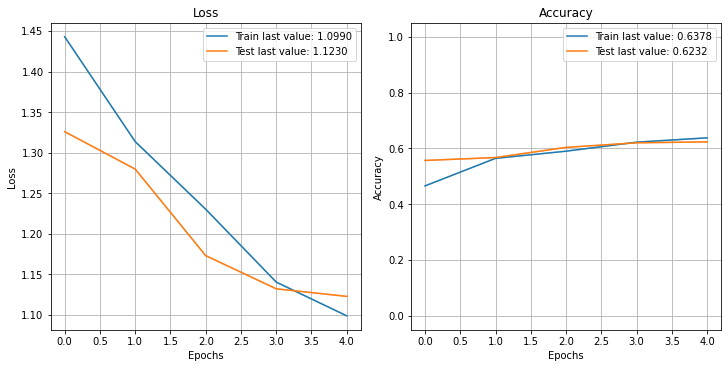

In [ ]:
loss, accuracy = model03.evaluate(X_train, dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model03.evaluate(X_val, dummy_y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(hist03)